In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import datetime as dt
%matplotlib widget
# %matplotlib notebook

import sounddevice

# Sampling & Aliasing
https://www.youtube.com/watch?v=2pbYKDW0myU

In [11]:
#!pip install sounddevice

In [2]:
# fs Sample rate
fs = 10000
t = np.arange(0,3,1/fs)
t

array([0.0000e+00, 1.0000e-04, 2.0000e-04, ..., 2.9997e+00, 2.9998e+00,
       2.9999e+00])

In [3]:
#https://piano-music-theory.com/2016/05/29/musical-note-sounds-pitches-and-their-frequency/

In [4]:
f1 = 261.63*2
f2 = 329.63*2
f3 = 392*2
n1=np.sin(2*np.pi*f1*t)
n2=np.sin(2*np.pi*f2*t)
n3=np.sin(2*np.pi*f3*t)
noise = np.array([np.random.randn() for xx in n3])/5

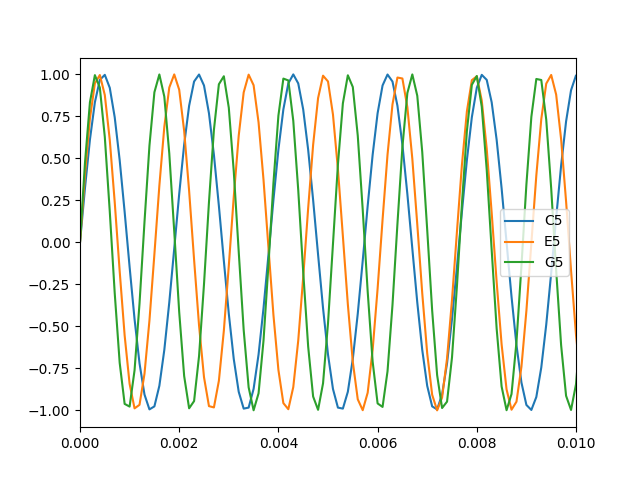

In [5]:
w = n1+n2+n3+noise
plt.figure()
plt.plot(t,n1, label='C5')
plt.plot(t,n2, label='E5') 
plt.plot(t,n3, label='G5')
ax = plt.gca()
ax.set_xlim([0 ,.01])
plt.legend()

In [16]:
import sounddevice as sd
fs = 10000
sd.play(n1, samplerate=fs)
#sd.play(n2, samplerate=fs)
#sd.play(n3, samplerate=fs)

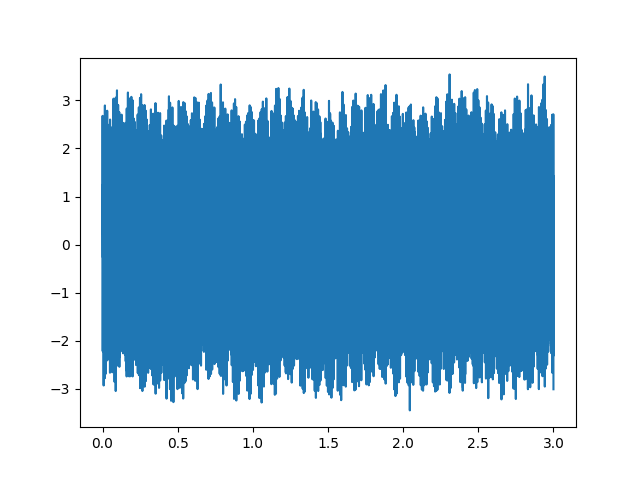

In [6]:
plt.figure()
plt.plot(t,w)

Text(0, 0.5, 'PSD [V**2/Hz]')

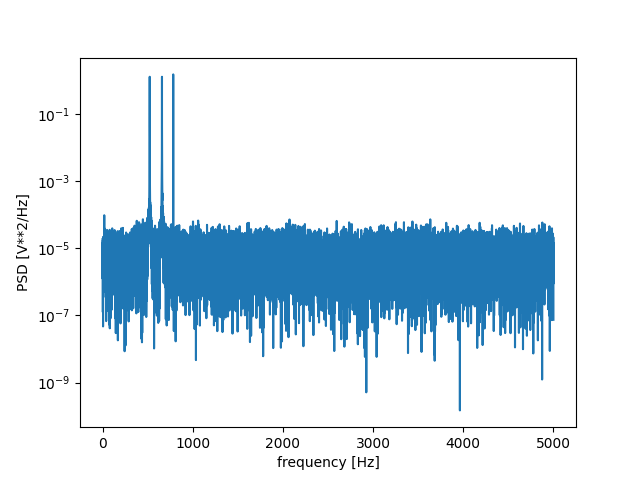

In [7]:
from scipy import signal
plt.figure()

f, Pxx_den = signal.periodogram(w,fs=fs)
plt.semilogy(f[1:], Pxx_den[1:])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#>>> plt.show()
# Fourier Analysis  (Fast Fourier Transform)

In [8]:
import sounddevice as sd
fs = 10000

sd.play(n1+n2+n3, samplerate=fs)
#sd.play(noise, samplerate=fs)
#sd.play(w, samplerate=fs)


In [9]:
# "High pass" filter
#filt = signal.firwin(101, .75, pass_zero=False)

# "Low Pass" filter
filt = signal.firwin(101, .2, pass_zero=True)


In [10]:
filtered = np.convolve(filt, w)



Text(0, 0.5, 'PSD [V**2/Hz]')

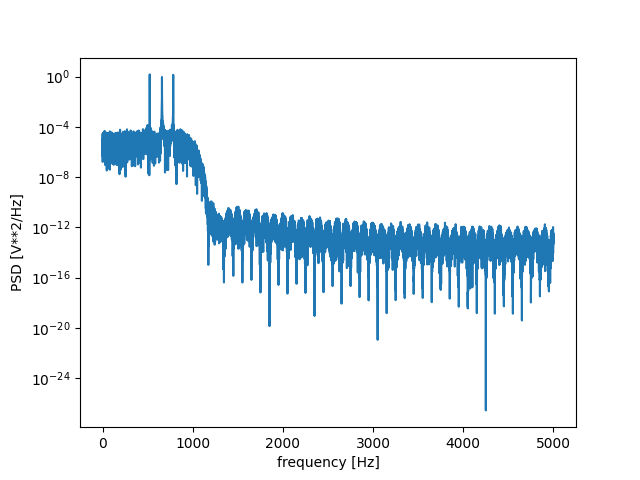

In [11]:
plt.figure()
f, Pxx_den = signal.periodogram(filtered,fs=fs)
plt.semilogy(f[1:], Pxx_den[1:])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#>>> plt.show()

In [12]:
sd.play(w, fs)
#sd.play(filtered, fs)